In [145]:
import numpy as np
from matplotlib import pyplot as plt
import pyvista as pv


In [146]:
# ファイル名を指定してデータを読み込む
mesh = pv.read('../data/Tetra_Cells30000/Tetra_Cells30000_4_0.vtu')
mesh_full = pv.read('../data/Tetra_Cells30000/Tetra_Cells30000_0_0.vtu')


In [147]:
# # メッシュデータを表示する
# mesh.plot(show_edges=True, show_grid=True, color='w', cpos='xy')


In [148]:
mesh.cells_dict

{5: array([[  0,   1,   2],
        [  3,   4,   5],
        [  6,   3,   5],
        ...,
        [705, 725, 726],
        [726, 694, 685],
        [726, 685, 705]])}

In [149]:
points = np.array(mesh.points.tolist()) 
points_full = np.array(mesh_full.points.tolist()) 
points.shape


(727, 3)

In [150]:
z_distance = np.linalg.norm(points[:,0:2], axis=1)
z_distance.shape


(727,)

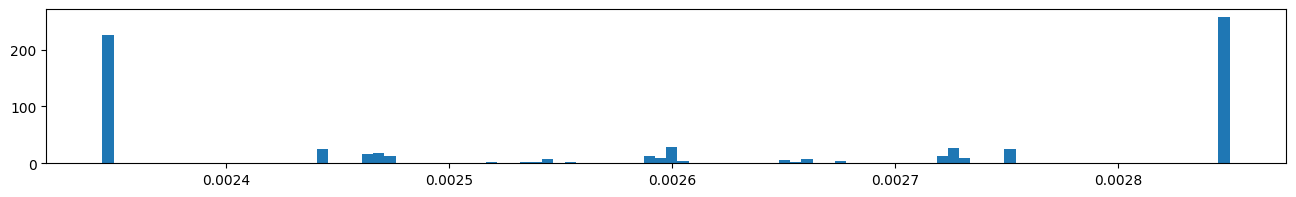

In [151]:
plt.figure(figsize=(16,2))
plt.hist(z_distance, bins=100)
plt.show()


In [152]:
mask = z_distance<0.00245
wall = points[mask]
wall.shape


(250, 3)

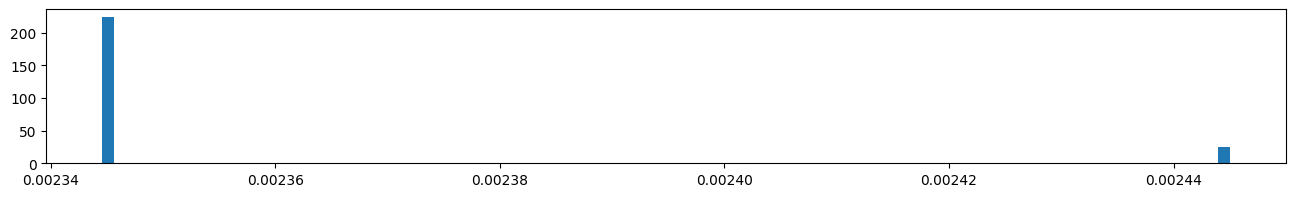

In [153]:
plt.figure(figsize=(16,2))
plt.hist(z_distance[mask], bins=100)
plt.show()


In [154]:
l = np.arctan2(wall[:,0], wall[:,1]) * 0.002345
l.max(), l.min()


(0.0012278392002470584, -0.0012278392364995481)

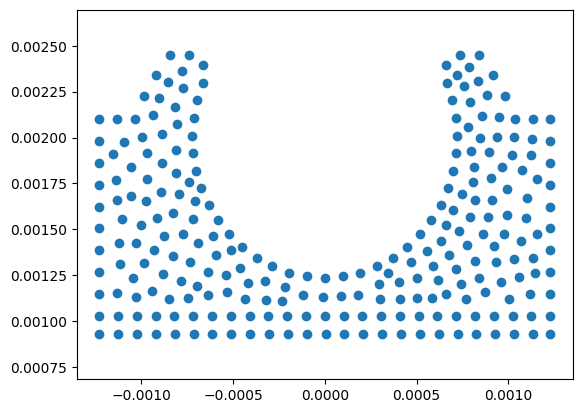

In [155]:
plt.plot(l, wall[:,2], 'o')
plt.axis('equal')
plt.show()



In [156]:
lz = np.array([l, wall[:,2]]).T
lz.shape


(250, 2)

In [157]:
Olz_temp = np.array([0, 0.0020])
Olz_temp_dist = np.linalg.norm(lz - Olz_temp, axis=1)
Olz_temp_dist.shape


(250,)

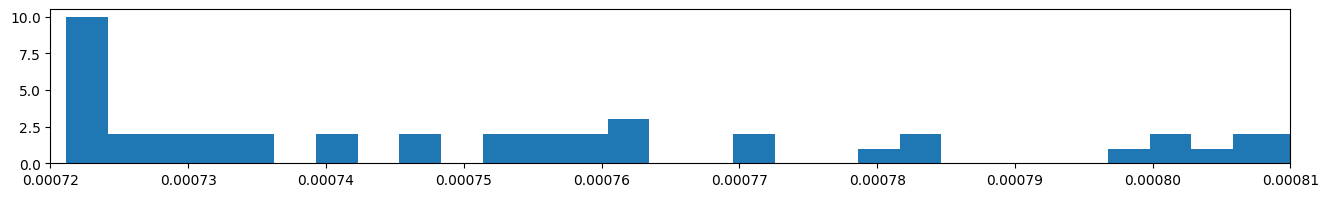

In [158]:
plt.figure(figsize=(16,2))
plt.hist(Olz_temp_dist, bins=300)
plt.xlim([0.00072, 0.00081])
plt.show()


In [159]:
lz_edge = lz[Olz_temp_dist<0.000765]
lz_edge.shape


(31, 2)

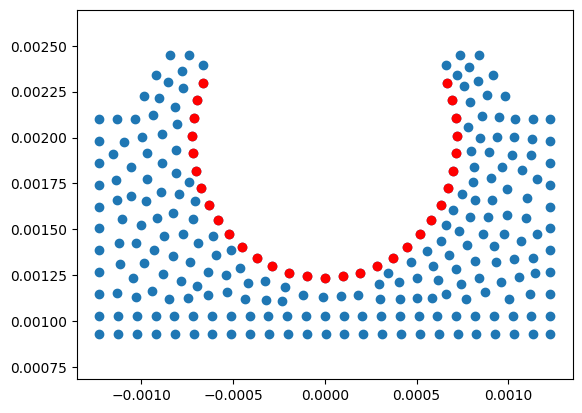

In [160]:
plt.plot(l, wall[:,2], 'o')
plt.plot(lz_edge[:,0], lz_edge[:,1], 'ro')
plt.axis('equal')
plt.show()



In [161]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    # Calculate the distances between Olz_temp and lz_edge
    distances = np.linalg.norm([0,x[0]] - lz_edge, axis=1)
    # Calculate the variance of the distances
    variance = np.var(distances)
    return variance

# Define the initial guess for Olz_temp
x0 = Olz_temp[1]

# Perform the optimization
result = minimize(objective, x0)

# Get the optimized point
Olz = np.array([0, result.x[0]])
Olz


array([0.        , 0.00198778])

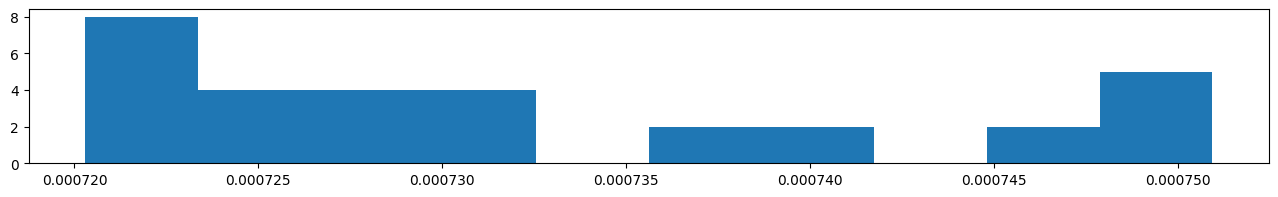

In [162]:
Olz_dist = np.linalg.norm(lz_edge - Olz, axis=1)

plt.figure(figsize=(16,2))
plt.hist(Olz_dist, bins=10)
plt.show()

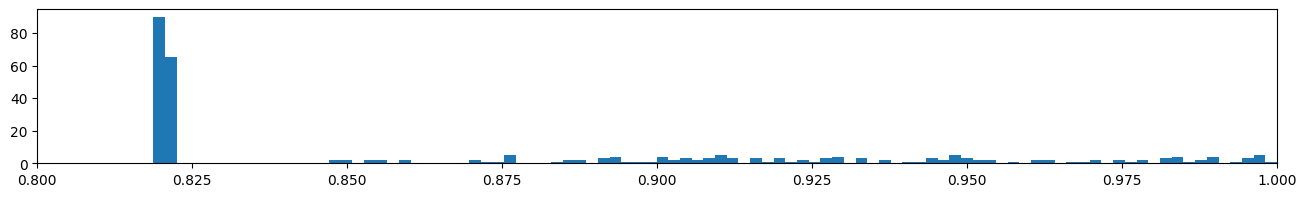

In [163]:
Oxyz = np.array([0, 0.00265, 0.00200])
Oxyz_dist = np.linalg.norm(points - Oxyz, axis=1)

plt.figure(figsize=(16,2))
plt.hist(Oxyz_dist*1e3, bins=500)
plt.xlim([0.00080e3, 0.00100e3])
plt.show()


In [164]:
Oxyz_face = points[(Oxyz_dist<0.00084)]
Oxyz_face.shape


(155, 3)

In [165]:
Oxyz_edge = points[(Oxyz_dist>0.00084) & (Oxyz_dist<0.00086)]
Oxyz_edge.shape


(10, 3)

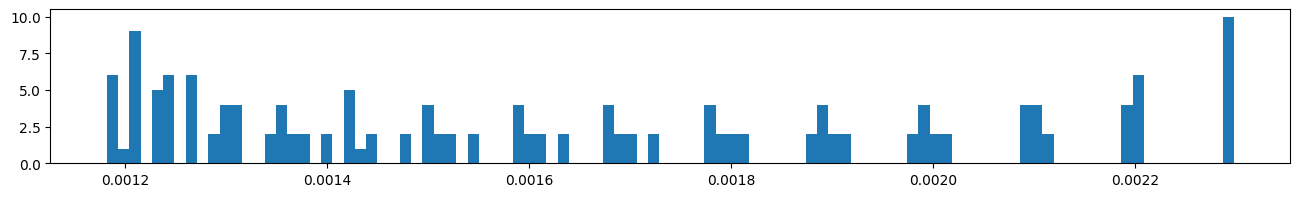

In [166]:
plt.figure(figsize=(16,2))
plt.hist(Oxyz_face[:,2], bins=100)
plt.show()

In [167]:
face_top = Oxyz_face[Oxyz_face[:,2]>0.00225]
face_top.shape

(10, 3)

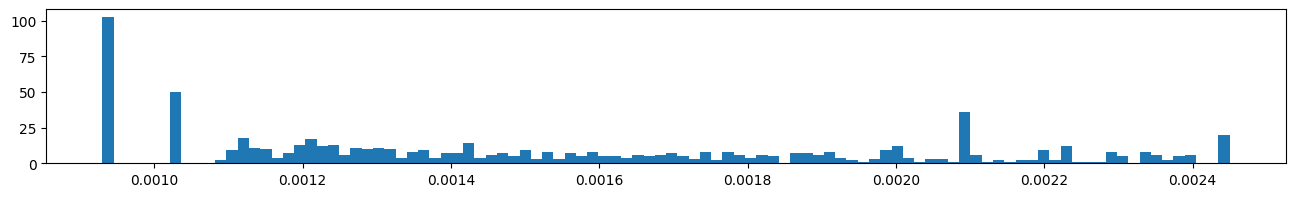

In [168]:
plt.figure(figsize=(16,2))
plt.hist(points[:,2], bins=100)
plt.show()

In [169]:
top_face = points[points[:,2]>0.00241]
top_face.shape


(20, 3)

In [170]:
top_face[:,2].max(), face_top[:,2].max()

(0.0024500000290572643, 0.002298100385814905)

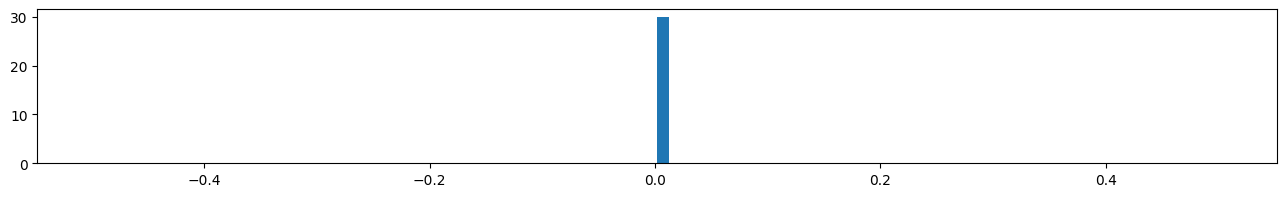

In [171]:
shoulder = points[(points[:,2]>2.099e-3)&(points[:,2]<2.1001e-3)]

plt.figure(figsize=(16,2))
plt.hist(shoulder[:,2], bins=100)
plt.show()

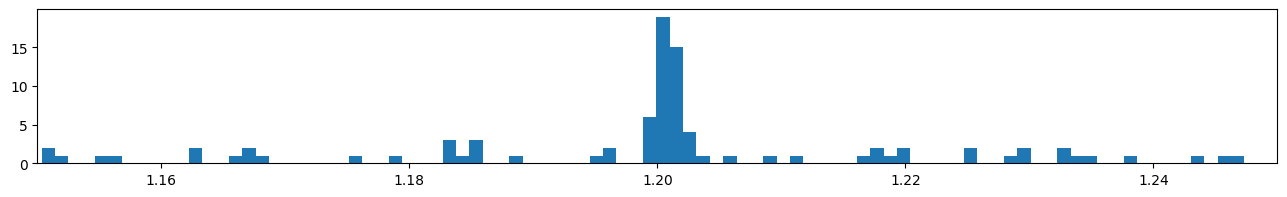

In [172]:
Osh = np.array([0, 0.00265, 0.00170])

Osh_dist = np.linalg.norm(points - Osh, axis=1)

plt.figure(figsize=(16,2))
plt.hist(Osh_dist*1e3, bins=1000)
plt.xlim([0.00115e3, 0.00125e3])

plt.show()


In [173]:
neck = points[(Osh_dist>1.19e-3)&(Osh_dist<1.23e-3)&(points[:,2]>2.05e-3)]

neck_dist = np.linalg.norm(neck - Osh, axis=1)
neck_dist.shape


(40,)

In [174]:
bottom_edge = points[(points[:,2]>0.0010)&(points[:,2]<0.00105)]
bottom_edge.shape


(50, 3)

In [175]:
bottom = points[(points[:,2]<0.00100)]
bottom.shape


(103, 3)

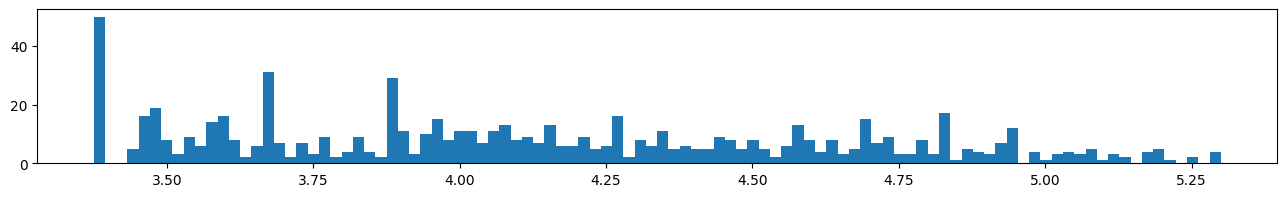

In [176]:
plt.figure(figsize=(16,2))
plt.hist((z_distance + points[:,2])*1e3, bins=100)

plt.show()

In [177]:
cone_in = points[(z_distance + points[:,2])<3.4e-3]
cone_in.shape


(50, 3)

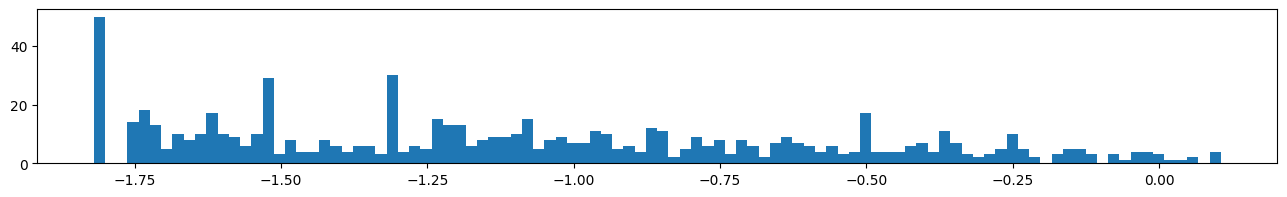

In [178]:
plt.figure(figsize=(16,2))
plt.hist((-z_distance + points[:,2])*1e3, bins=100)

plt.show()

In [179]:
cone_out = points[(-z_distance + points[:,2])<-1.8e-3]
cone_out.shape

(50, 3)

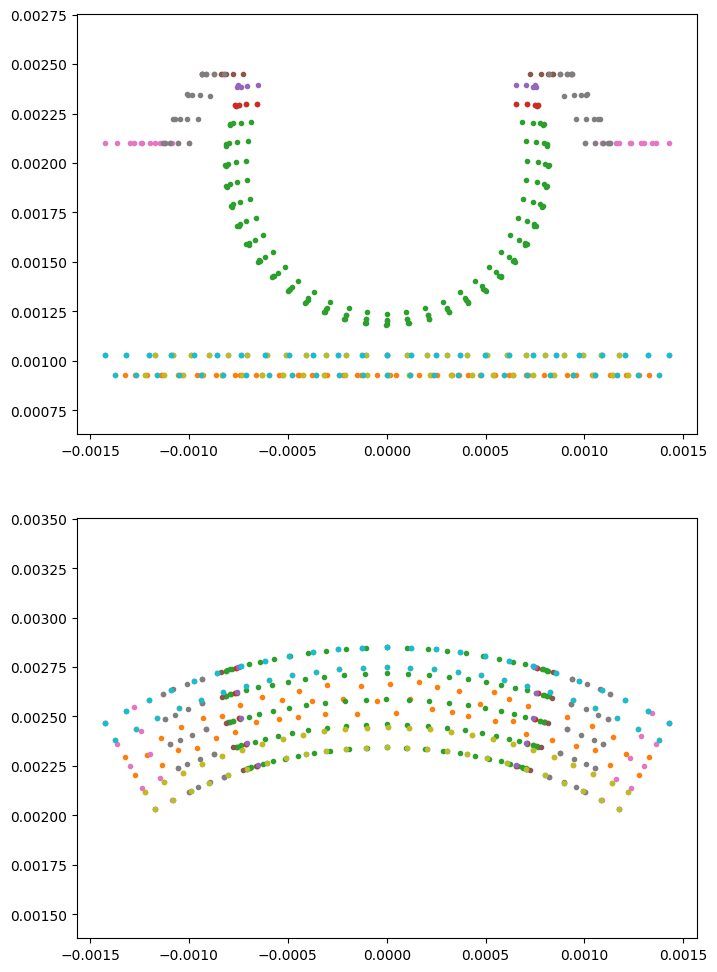

In [181]:
key_list = ['bottom_edge', 'bottom', 'Oxyz_face', 'face_top', 'Oxyz_edge', 'top_face', 'shoulder', 'neck', 'cone_in', 'cone_out']

fig, ax = plt.subplots(2, 1, figsize=(8, 12))
plot_key = lambda key,i: ax[i].plot(eval(key)[:,0], eval(key)[:,2-i], '.')

for i in[0,1]:
    for key in key_list:
        plot_key(key,i,)
    ax[i].axis('equal')


In [109]:
(2.45e-3 - face_top[:,2].max()) * 1e3

0.15189961418509476

In [110]:
(2.45e-3 - Oxyz_edge[:,2].max()) * 1e3


0.05389770381152622

In [111]:
(2.45e-3 - Oxyz_edge[:,2].max()) / (2.45e-3 - face_top[:,2].max())


0.3548244944575703

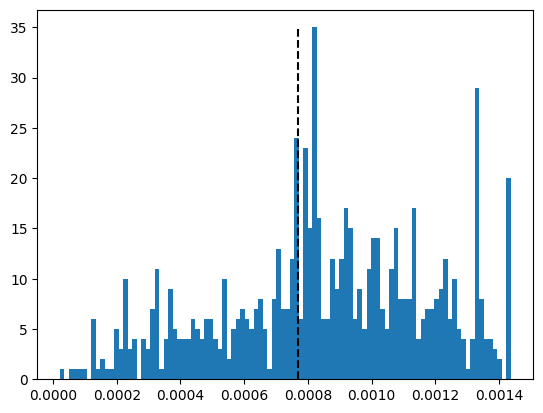

In [112]:
z_apt = np.linalg.norm(points[:,:2] - Oxyz[:2], axis=1)

plt.hist(z_apt, bins=100)
plt.vlines(0.769e-3, 0, 35, linestyles='dashed', color='k')
plt.show()


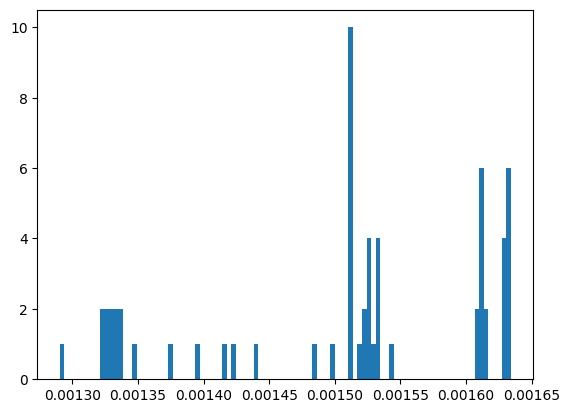

In [113]:
plt.hist((-z_apt + points[:,2])[points[:,2]>2.25e-3], bins=100)
plt.show()


In [114]:
-0.769e-3 + 2.45e-3 - 0.152e-3 * 0.355

0.0016270399999999997

In [138]:
azimath = np.rad2deg(np.arctan2(points[:,1], points[:,0]))
end_left = points[(azimath < 60*1.001)]
end_right = points[(azimath > 120*0.999)]

end_left.shape, end_right.shape


((27, 3), (27, 3))

In [139]:
azimath_full = np.rad2deg(np.arctan2(points_full[:,1], points_full[:,0]))
end_left_full = points_full[(azimath_full < 60*1.001)]
end_right_full = points_full[(azimath_full > 120*0.999)]

end_left_full.shape, end_right_full.shape


((379, 3), (379, 3))

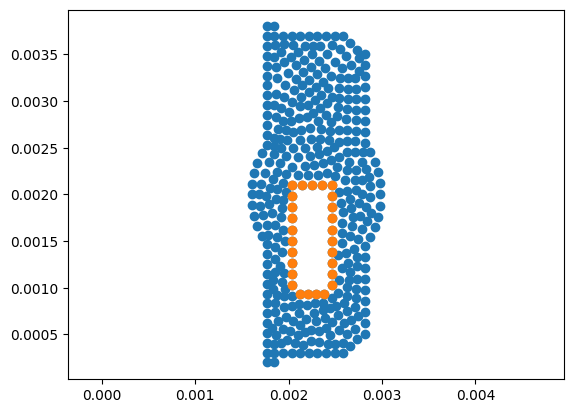

In [143]:
plt.plot(end_left_full[:,1], end_left_full[:,2], 'o')
plt.plot(end_left[:,1], end_left[:,2], 'o')
plt.axis('equal')
plt.show()


## 楕円近似


In [115]:
r = np.linalg.norm(Oxyz_face - Oxyz, axis=1).mean()
r


0.0008204129771476615

In [116]:
R = z_distance.min()
R


0.0023446180857718086

In [117]:
d = Oxyz[1]
d


0.00265

In [118]:
def row_of_cosine(r, R, d):
    return (R*R + d*d - r*r) / (2 * d * R)

cosθ = row_of_cosine(r, R, d)
cosθ


0.9533400019185312

In [119]:
sinθ = np.sqrt(1 - cosθ**2)
sinθ

0.30189872596944656

In [120]:
xθ0   = np.array([ R*sinθ, R*cosθ, Oxyz[2]])
xθ180 = np.array([-R*sinθ, R*cosθ, Oxyz[2]])
xθ0, xθ180

(array([0.00070784, 0.00223522, 0.002     ]),
 array([-0.00070784,  0.00223522,  0.002     ]))

In [121]:
dx0  = xθ0[0]
dx0


0.0007078372129794316

In [122]:
dz0 = np.sqrt(r*r - (d-R)*(d-R))
dz0


0.0007614586919423896

In [123]:
xθ90  = np.array([0, R, Oxyz[2] + dz0])
xθ270 = np.array([0, R, Oxyz[2] - dz0])

xθ90, xθ270


(array([0.        , 0.00234462, 0.00276146]),
 array([0.        , 0.00234462, 0.00123854]))

In [124]:
wall_edge = wall[Olz_temp_dist < 0.000765]

In [125]:
def get_xφ(φ):
    xφ = xθ0[0]*np.sin(φ)
    yφ = np.sqrt(xθ90[1]**2 - xφ**2)
    zφ = dz0*np.cos(φ)+Oxyz[2]
    return np.array([xφ, yφ, zφ])

get_xφ(0)

array([0.        , 0.00234462, 0.00276146])

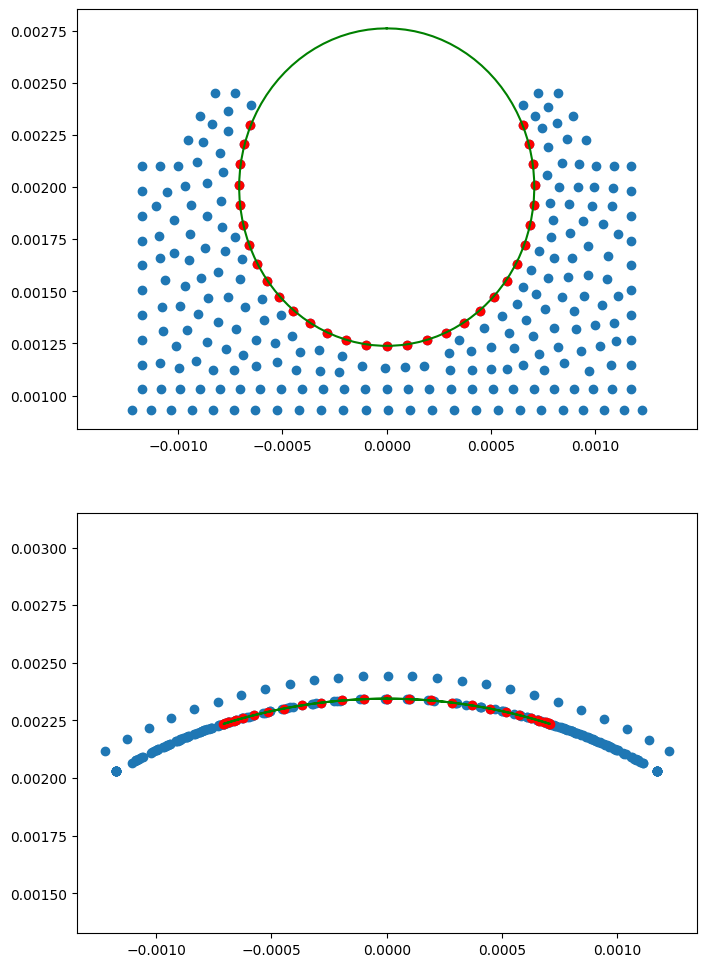

In [126]:

φarray = np.linspace(0, 1, 100) * 2*np.pi
xφarray = np.array([get_xφ(φ) for φ in φarray])

fig,ax = plt.subplots(2, 1, figsize=(8,12))

for i in [0,1]:
    ax[i].plot(wall[:,0], wall[:,2-i], 'o')
    ax[i].plot(wall_edge[:,0], wall_edge[:,2-i], 'ro')
    ax[i].plot(xφarray[:,0], xφarray[:,2-i], 'g')
    ax[i].axis('equal')



やりたいこと

1. (python) 境界ノードの特定 →　ファイル出力
   1. 境界に名前付け
   2. 現在の設定（R=2.3mmとか）でちゃんと現在のエッジを再現できるか，ルールの設定・確認
   3. 同じ数式をrustに実装
   4. 対応するエッジ群のインデックスをファイルで出力
2. (rust) 線上のノードを等間隔に並べる
3. (rust) 面上のノードを制約付きスムージングする
4. (rust) 空間のノードを制約なしスムージングする

そもそも・・・

- パラメタを変更したらどう変わる？
  - ロジックだけ握ってればいい？
  - pythonは呼び出す？
  - マッピングだけだったらPythonでもよい．ただ今後インタラクティブ性を考えると・・・？
  - rustだと難しいこと ← エッジ抽出が人力になる ← でもこれは最初の1回だけ

次にやること
- 線のリスト，面のリストを出す．線に関しては並びにも注意する．面はどこかによって制約が異なるため，面の種類ごとに分別して出力する．エッジは含まない．


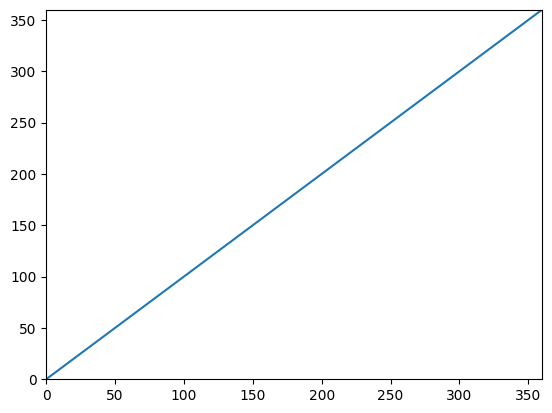

In [127]:
def np_arctan2(y, x):
    angles = np.arctan2(y, x) - np.pi/2
    return np.where(angles < 0, angles + 2 * np.pi, angles)

plt.plot(np.rad2deg(φarray), np.rad2deg(np_arctan2(np.cos(φarray), -np.sin(φarray))))
plt.xlim([0, 360])
plt.ylim([0, 360])

plt.show()


In [128]:
wall_edge_angle = np_arctan2((wall_edge[:,2]-Oxyz[2])/dz0, wall_edge[:,0]/dx0)
np.int32(np.rad2deg(wall_edge_angle))


array([187, 179, 172, 156, 148, 141, 133, 126, 118, 111, 103,  96,  89,
        81, 164, 211, 203, 218, 226, 233, 195, 285, 278, 241, 248, 256,
       263, 270, 292,  74,  67], dtype=int32)

(-0.0013447498728055506,
 0.0013447499892208724,
 0.0008384270445542933,
 0.002853031627532299)

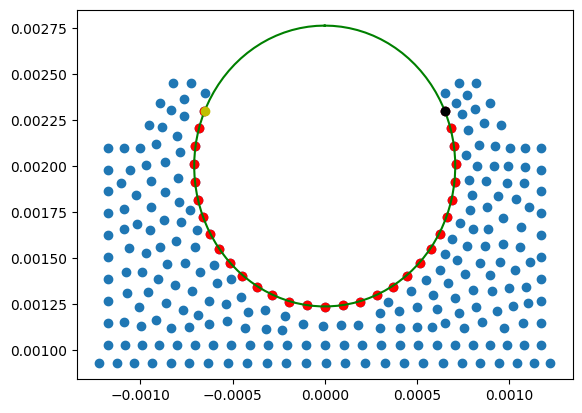

In [129]:
wall_edge_first = wall_edge_angle.min()
wall_edge_end = wall_edge_angle.max()
xφ_first = get_xφ(wall_edge_first)
xφ_end = get_xφ(wall_edge_end)

plt.plot(wall[:,0], wall[:,2], 'o')
plt.plot(wall_edge[:,0], wall_edge[:,2], 'ro')
plt.plot(xφarray[:,0], xφarray[:,2], 'g')
plt.plot(xφ_first[0], xφ_first[2], 'ko')
plt.plot(xφ_end[0], xφ_end[2], 'yo')
plt.axis('equal')


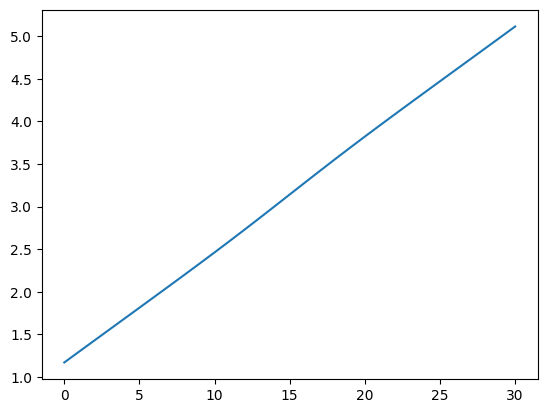

In [130]:
wall_edge_angle.sort()
plt.plot(wall_edge_angle)


In [131]:
point_indices = lambda p: np.where(np.isin(points, p).all(axis=1))[0]
wall_edge_indices = point_indices(wall_edge)

print(wall_edge[:4,0])
print(points[wall_edge_indices,0][:4])
print(wall_edge_indices.shape)
print(wall_edge_indices[:6])


[ 9.77182062e-05 -5.46314949e-09 -9.77289455e-05 -2.84502981e-04]
[ 9.77182062e-05 -5.46314949e-09 -9.77289455e-05 -2.84502981e-04]
(31,)
[38 40 41 52 54 56]


In [132]:
Oxyz_face_indices = point_indices(Oxyz_face)
# Oxyz_face_indices = np.setdiff1d(wall_edge_indices, Oxyz_face_indices)

print(Oxyz_face[:4,0])
print(points[Oxyz_face_indices,0][:4])
print(Oxyz_face_indices.shape)
print(Oxyz_face_indices[18:24])


[-0.00069842 -0.00074698 -0.00030611 -0.00020686]
[-0.00069842 -0.00074698 -0.00030611 -0.00020686]
(155,)
[38 39 40 41 42 43]


In [133]:
# Create new indices by removing wall_edge_indices from Oxyz_face_indices
new_indices = np.setdiff1d(Oxyz_face_indices, wall_edge_indices)
new_indices[18:24]


array([39, 42, 43, 44, 45, 46])

xmlのイメージ．Edgeは並び順に注意．FaceはEdgeを含まない．

```xml
<Edge>
    <InPocket>
        8 39 40 41 42 43
    </InPocket>
    <OutPocket>
        8 39 40 41 42 43
    </OutPocket>}
    <InLine>
        8 39 40 41 42 43
    </InLine>
    <InBottomLine>
        8 39 40 41 42 43
    </InBottomLine>
</Edge>
<Face>
    <Pocket>
        8 39 40 41 42 43
    </Pocket>
</Face>
```

In [134]:
z_distance.min(), z_distance.max()

(0.0023446180857718086, 0.002850000386131237)

In [135]:
points[:,2].min(), points[:,2].max()

(0.0009299999801442027, 0.0024500000290572643)

In [136]:
bottom_edge[:,2].min() - points[:,2].min()

0.00010000006295740604

## 次にやること

### インデックスの出力

1. 各頂点の(x,y,z)を保持器のVTKファイルから読み取る．
2. 同時に，エッジの(x,y,z)も取得する．この際，順番も加味する
3. 面のインデックスも必要．並びは気にしなくてもいい．
5. 上記1，2，3の要素の合計が，Rustの結果と一致しているかを確認．
4. 全体のVTKファイルから，各座標に対応する点のインデックスを取得する．
6. 上記の通りのXML形式で，ファイル出力する

### ルールの確認

1. 現在のポケット半径や保持器内径で座標を計算し，VTKと一致するか確認


In [137]:
# Parameters

Rp = 0.825e-3
xp = [0, 2.65e-3, 2.00e-3] # y成分だけ？
Ri = 2.345e-3
Ro = 2.85e-3
hz = 2.45e-3

xsh = [0, 2.65e-3, 2.00e-3 - 0.30e-3]
Rsh = 1.2e-3

hsh = 2.10e-3
lsh = 0.93e-3
bevel = 0.10e-3
